# ***Collecting international economic data: GDP, Unemployment Rate, Inflation and oficial Interest rates***
---

Data collected from the OECD Stats database (https://stats.oecd.org/). 

# Loading packages

Using Statistical Data and Metadata eXchange (SDMX) and pandasdmx to request OECD data.

In [1]:
import pandas as pd 
import datetime as dt 

# %pip install pandasdmx
import pandasdmx as pdmx

import seaborn as sns 
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\henri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandasdmx\remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


# Connecting w/ OECD database

In [2]:
oecd = pdmx.Request('OECD')

# Gross Domestic Product - GDP
---

In [3]:
gdp = oecd.data(
    resource_id = 'QNA',                                                       # GDP data from Quarterly National Accounts section (QNA)  
    key = 'AUS+CHL+JPN+MEX+GBR+USA+EA19+ARG+BRA+CHN+RUS+SAU.B1_GE.GYSA+GPSA.Q' # Countries and economic indicator selected: B1_GE (GDP expenditure approach)
                                                                               # GYSA and GPSA (year-on-year and period-on-period % change)
                                                                               # Q (frequency: quarterly)
                                                                               # B1_GE: Gross domestic product - expenditure approach
).to_pandas()

In [4]:
raw_gdp = pd.DataFrame(gdp).reset_index()
print(raw_gdp.head())

  LOCATION SUBJECT MEASURE FREQUENCY TIME_PERIOD     value
0      ARG   B1_GE    GPSA         Q     1993-Q2  2.852959
1      ARG   B1_GE    GPSA         Q     1993-Q3  2.010236
2      ARG   B1_GE    GPSA         Q     1993-Q4  0.805455
3      ARG   B1_GE    GPSA         Q     1994-Q1  1.421339
4      ARG   B1_GE    GPSA         Q     1994-Q2  2.068260


## Cleaning and organizing data

In [5]:
gdp = (
    raw_gdp[(raw_gdp.FREQUENCY == 'Q')]
    .drop(['SUBJECT', 'FREQUENCY'], axis = 1)
    .rename({'LOCATION' : 'country',
             'MEASURE' : 'measure',
             'TIME_PERIOD': 'date'}, axis = 1)
    .assign(date = lambda x: pd.to_datetime(x['date']), 
            measure = lambda x: x['measure'].replace({'GPSA' : '%YOY',
                                                      'GYSA' : '%QOQ'}))
)

print(gdp.head())

  country measure       date     value
0     ARG    %YOY 1993-04-01  2.852959
1     ARG    %YOY 1993-07-01  2.010236
2     ARG    %YOY 1993-10-01  0.805455
3     ARG    %YOY 1994-01-01  1.421339
4     ARG    %YOY 1994-04-01  2.068260


In [6]:
gdp_xxi = gdp[(gdp.date > '2000-12-01') & (gdp.measure == '%QOQ')].reset_index() # Selecting 21st century data on GDP and Quarter-on-Quarter % changes 
gdp_xxi.drop(['index'], axis = 1, inplace = True)
print(gdp_xxi.head())

  country measure       date      value
0     ARG    %QOQ 2001-01-01  -1.397726
1     ARG    %QOQ 2001-04-01  -0.616979
2     ARG    %QOQ 2001-07-01  -4.991747
3     ARG    %QOQ 2001-10-01 -10.676443
4     ARG    %QOQ 2002-01-01 -15.219744


## Plotting

In [7]:
'''# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_theme(palette = 'bone')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('dark')'''

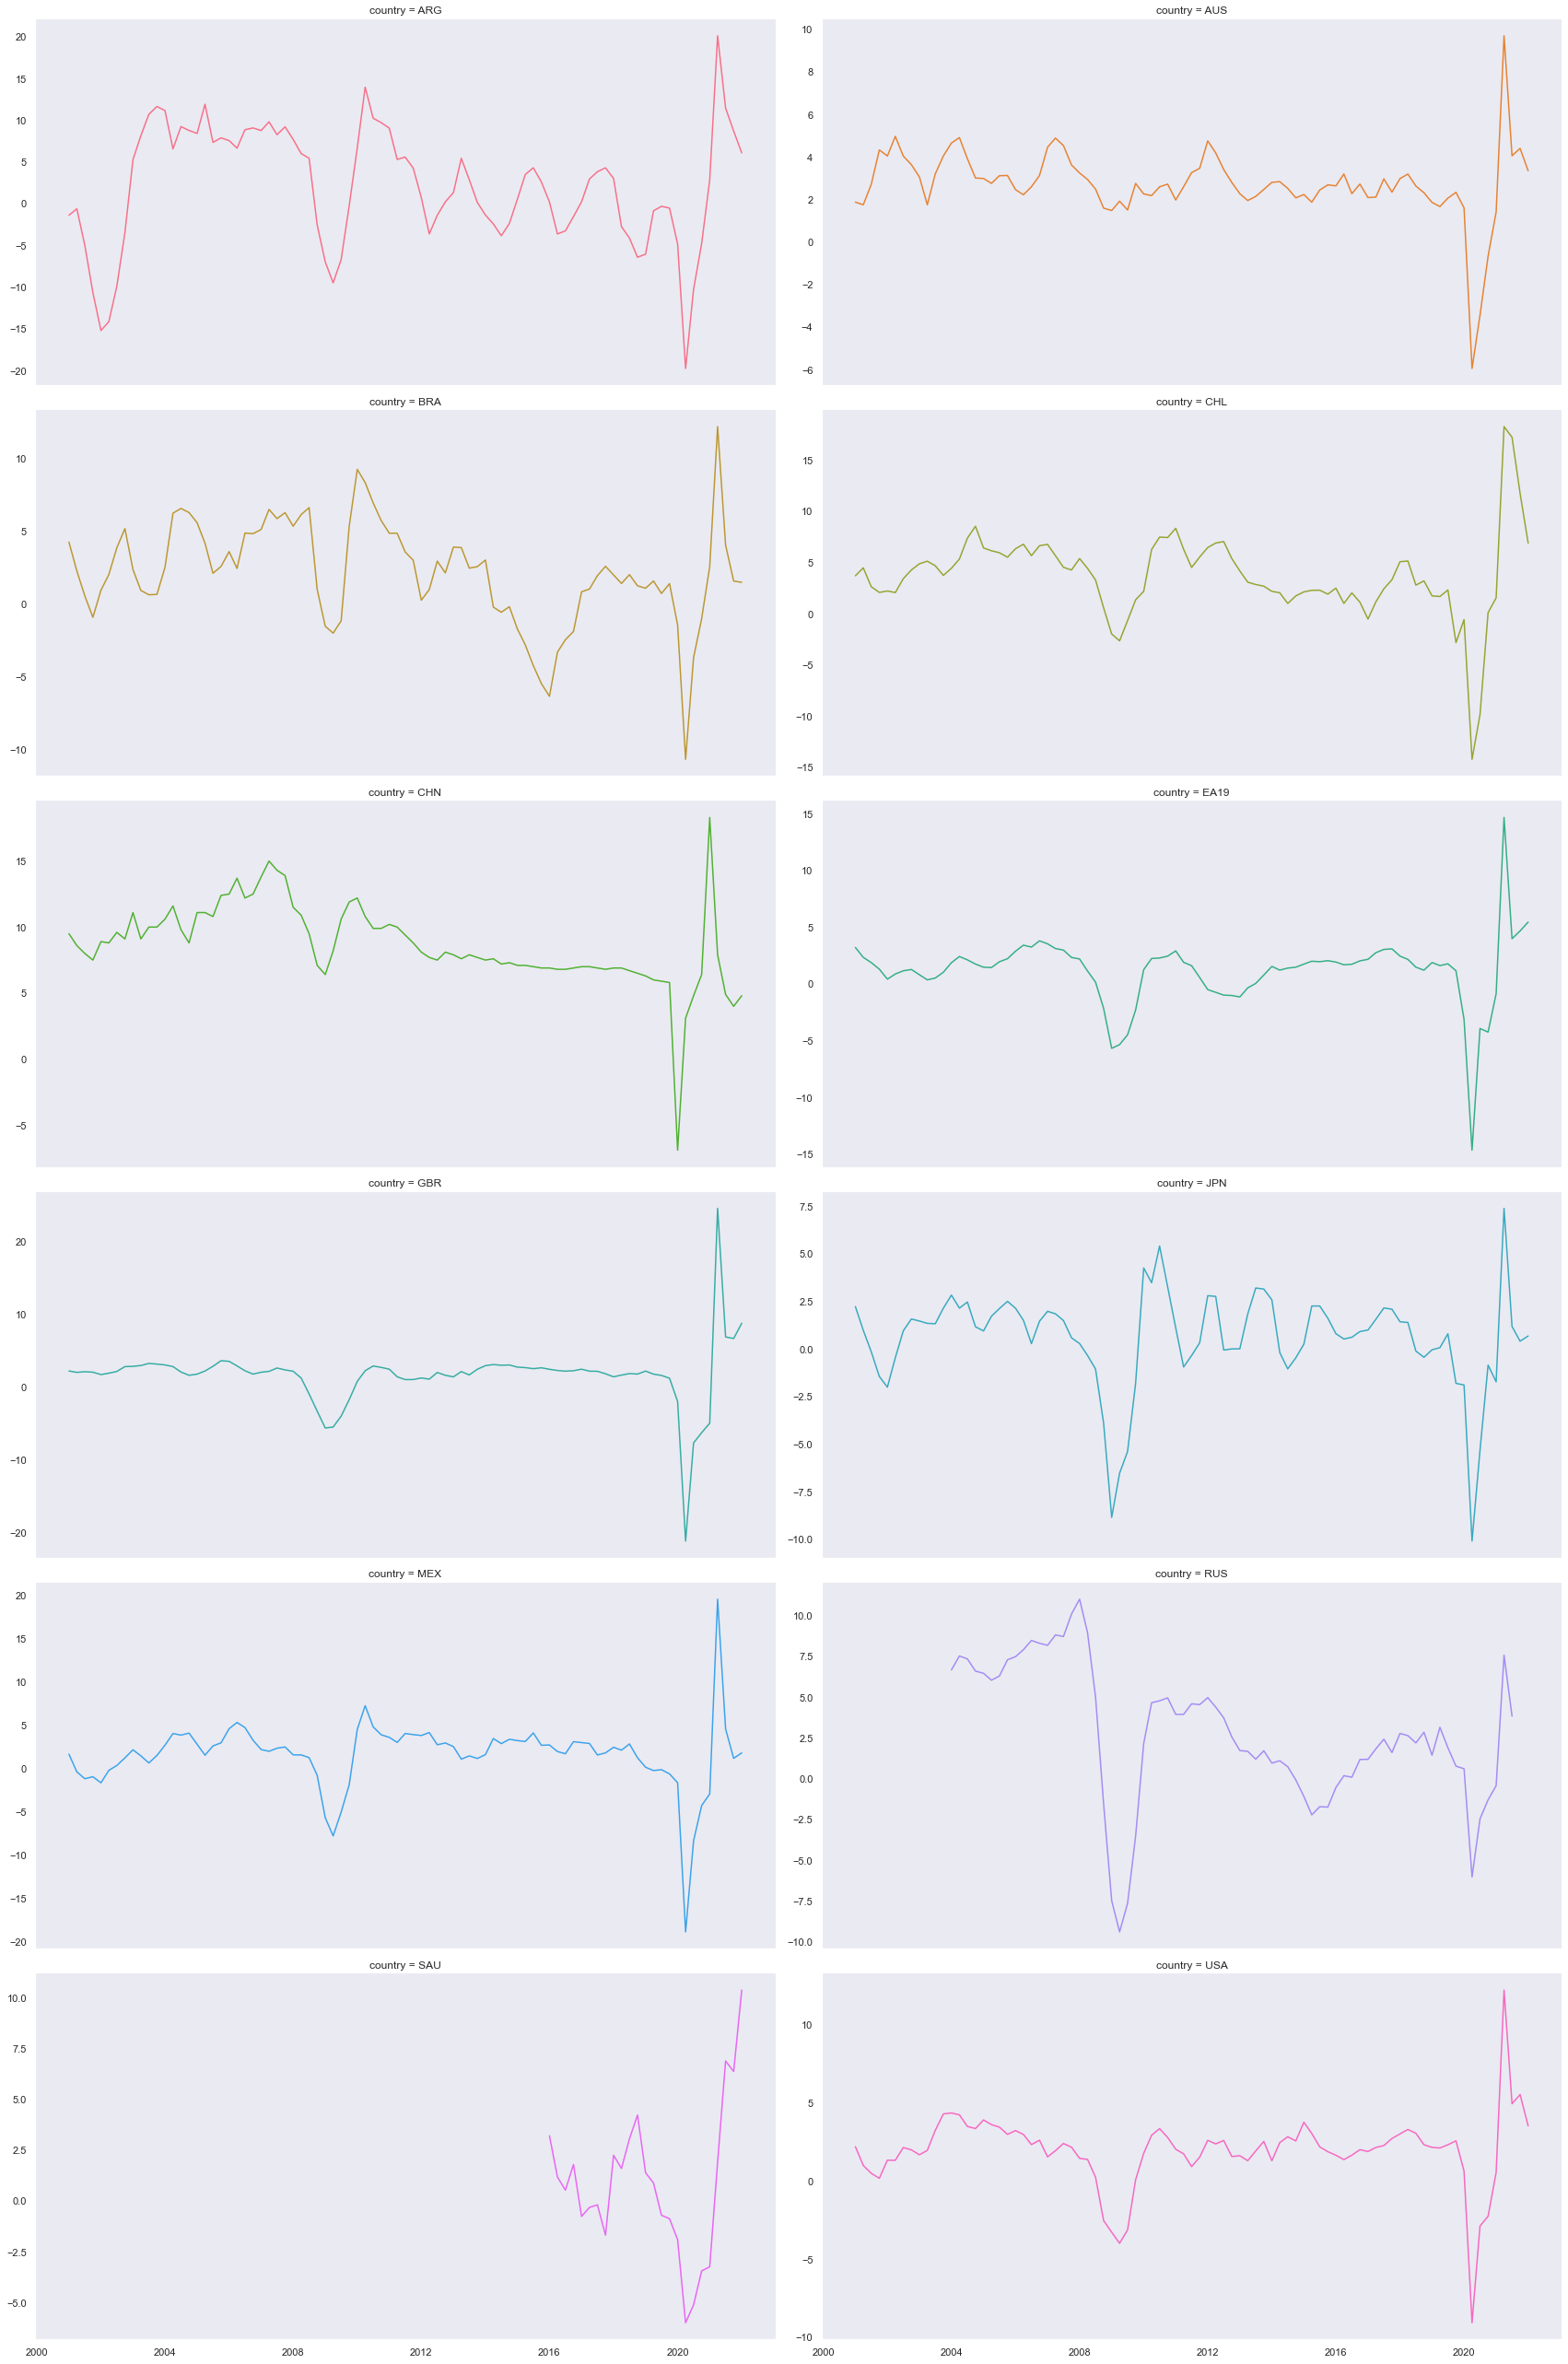

In [8]:
ax = sns.FacetGrid(gdp_xxi, col = 'country', col_wrap = 2, hue = 'country', sharey = False, height = 6, aspect = 2)
ax.map_dataframe(sns.lineplot, x = 'date', y = 'value').set(xlabel = '', ylabel = '')
plt.show()

# Industrial Production
---

In [21]:
iprod = oecd.data(
    resource_id = 'KEI',                                                          # KEI: Key Economic Short-Term Indicators section                                                             
    key = 'PRINTO01.AUS+CHL+JPN+MEX+GBR+USA+EA19+ARG+BRA+CHN+RUS+SAU.GP+GY.A+Q+M' # Countries and economic indicator selected: PRINTO01 
                                                                                  # (Industrial Production - s.a)
                                                                                  # GP + GY (Growth previous period + growth same period previous year)
                                                                                  # A + Q + M (frequency: annual + quarterly + monthly)
).to_pandas()

iprod_raw = pd.DataFrame(iprod).reset_index()
iprod_raw = iprod_raw.iloc[:, [1, 0, 2, 3, 4, 5]]
print(iprod_raw)

      LOCATION   SUBJECT MEASURE FREQUENCY TIME_PERIOD      value
0          AUS  PRINTO01      GP         A        2016   2.081690
1          AUS  PRINTO01      GP         A        2017   1.340248
2          AUS  PRINTO01      GP         A        2018   3.838352
3          AUS  PRINTO01      GP         A        2019   2.240789
4          AUS  PRINTO01      GP         A        2020  -0.713546
...        ...       ...     ...       ...         ...        ...
13703      USA  PRINTO01      GY         Q     2021-Q1  -2.170855
13704      USA  PRINTO01      GY         Q     2021-Q2  13.666669
13705      USA  PRINTO01      GY         Q     2021-Q3   4.914862
13706      USA  PRINTO01      GY         Q     2021-Q4   4.450336
13707      USA  PRINTO01      GY         Q     2022-Q1   4.951050

[13708 rows x 6 columns]


## Cleaning and organizing data

In [29]:
# Month-on-Month growth rates

mom_iprod = (
    iprod_raw[(iprod_raw['FREQUENCY'] == 'M') & (iprod_raw['MEASURE'] == 'GP')]
    .drop(['MEASURE', 'SUBJECT', 'FREQUENCY'], axis = 1)
    .rename({
        'LOCATION' : 'country',
        'TIME_PERIOD' : 'date'
    }, axis = 1)
    .assign(date = lambda x: pd.to_datetime(x['date'], format = '%Y-%m'))
).reset_index()

mom_iprod.drop(['index'], axis = 1, inplace = True)
print(mom_iprod)

     country       date     value
0        BRA 1975-02-01 -0.209656
1        BRA 1975-03-01 -1.845662
2        BRA 1975-04-01  6.344687
3        BRA 1975-05-01 -4.842144
4        BRA 1975-06-01  3.529814
...      ...        ...       ...
4997     USA 2022-01-01  0.420603
4998     USA 2022-02-01  0.812924
4999     USA 2022-03-01  0.681050
5000     USA 2022-04-01  1.320877
5001     USA 2022-05-01  0.098393

[5002 rows x 3 columns]


## Plotting

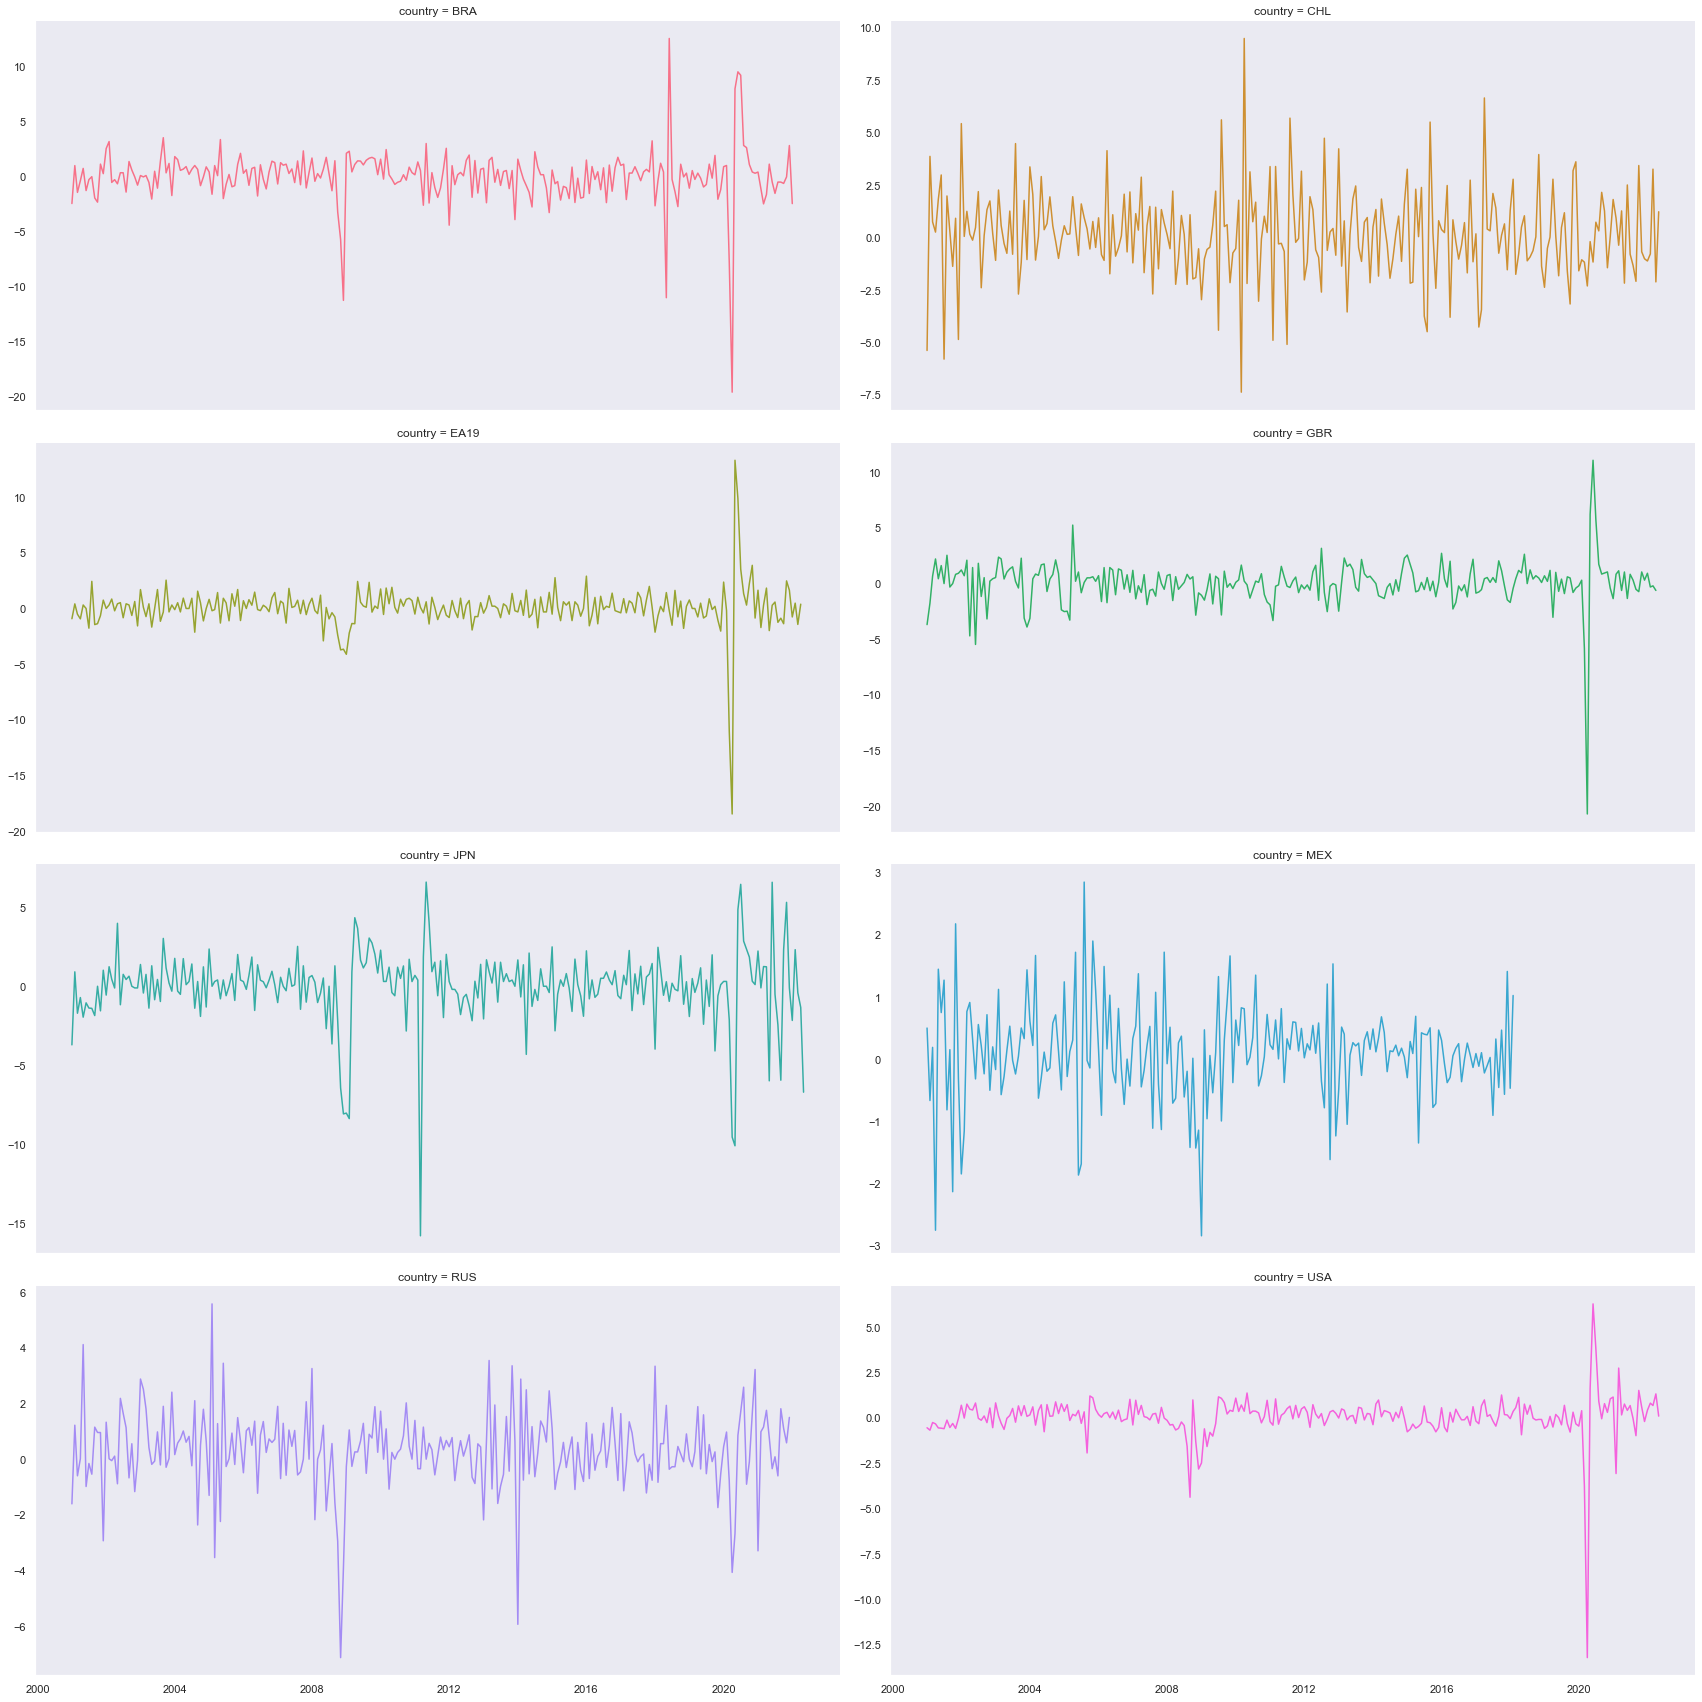

In [31]:
mom_iprod_xxi = mom_iprod[mom_iprod['date'] > '2000-12']

ax = sns.FacetGrid(mom_iprod_xxi, col = 'country', hue = 'country', col_wrap = 2, sharey = False, height = 6, aspect = 2)
ax.map_dataframe(sns.lineplot, x = 'date', y = 'value').set(xlabel = '', ylabel = '')
plt.show()

# Inflation - Consumer Price Index
---

In [9]:
cpi_data = oecd.data(
    resource_id = 'MEI',                                                        # MEI: Main Economic Indicators section
    key = 'AUS+CHL+JPN+MEX+GBR+USA+EA19+ARG+BRA+CHN+RUS+SAU.CPALTT01.GPSA+GY.M' # Countries and economic indicator selected: CPALTT01 
                                                                                # (Consumer Price Index - All items - Total - Total)
                                                                                # GPSA + GY (period-on-period and growth rate same period previous year % change)
                                                                                # M (frequency: monthly)
).to_pandas()

raw_cpi = pd.DataFrame(cpi_data).reset_index()
print(raw_cpi.head())

  LOCATION   SUBJECT MEASURE FREQUENCY TIME_PERIOD      value
0      ARG  CPALTT01      GY         M     2017-12  24.795600
1      ARG  CPALTT01      GY         M     2018-01  25.006226
2      ARG  CPALTT01      GY         M     2018-02  25.437113
3      ARG  CPALTT01      GY         M     2018-03  25.396523
4      ARG  CPALTT01      GY         M     2018-04  25.498157


## Cleaning and organizing data

In [10]:
cpi = (
    raw_cpi[(raw_cpi.FREQUENCY == 'M')]
    .drop(['SUBJECT', 'FREQUENCY'], axis = 1)
    .rename({
        'LOCATION' : 'country',
        'MEASURE' : 'measure',
        'TIME_PERIOD' : 'date'
    }, axis = 1)
    .assign(date = lambda x: pd.to_datetime(x['date'], format = '%Y-%m'),
            measure = lambda x: x['measure'].replace({'GY' : '12MCUM'})) # 12MCUM (Cummulated in 12 months)
)

print(cpi.head())

  country measure       date      value
0     ARG  12MCUM 2017-12-01  24.795600
1     ARG  12MCUM 2018-01-01  25.006226
2     ARG  12MCUM 2018-02-01  25.437113
3     ARG  12MCUM 2018-03-01  25.396523
4     ARG  12MCUM 2018-04-01  25.498157


In [11]:
cpi_xxi = cpi[(cpi.date > '2000-12-01')].reset_index() # selecting 21st century data on inflation
cpi_xxi.drop(['index'], axis = 1, inplace = True)
print(cpi_xxi.head())

  country measure       date      value
0     ARG  12MCUM 2017-12-01  24.795600
1     ARG  12MCUM 2018-01-01  25.006226
2     ARG  12MCUM 2018-02-01  25.437113
3     ARG  12MCUM 2018-03-01  25.396523
4     ARG  12MCUM 2018-04-01  25.498157


## Plotting

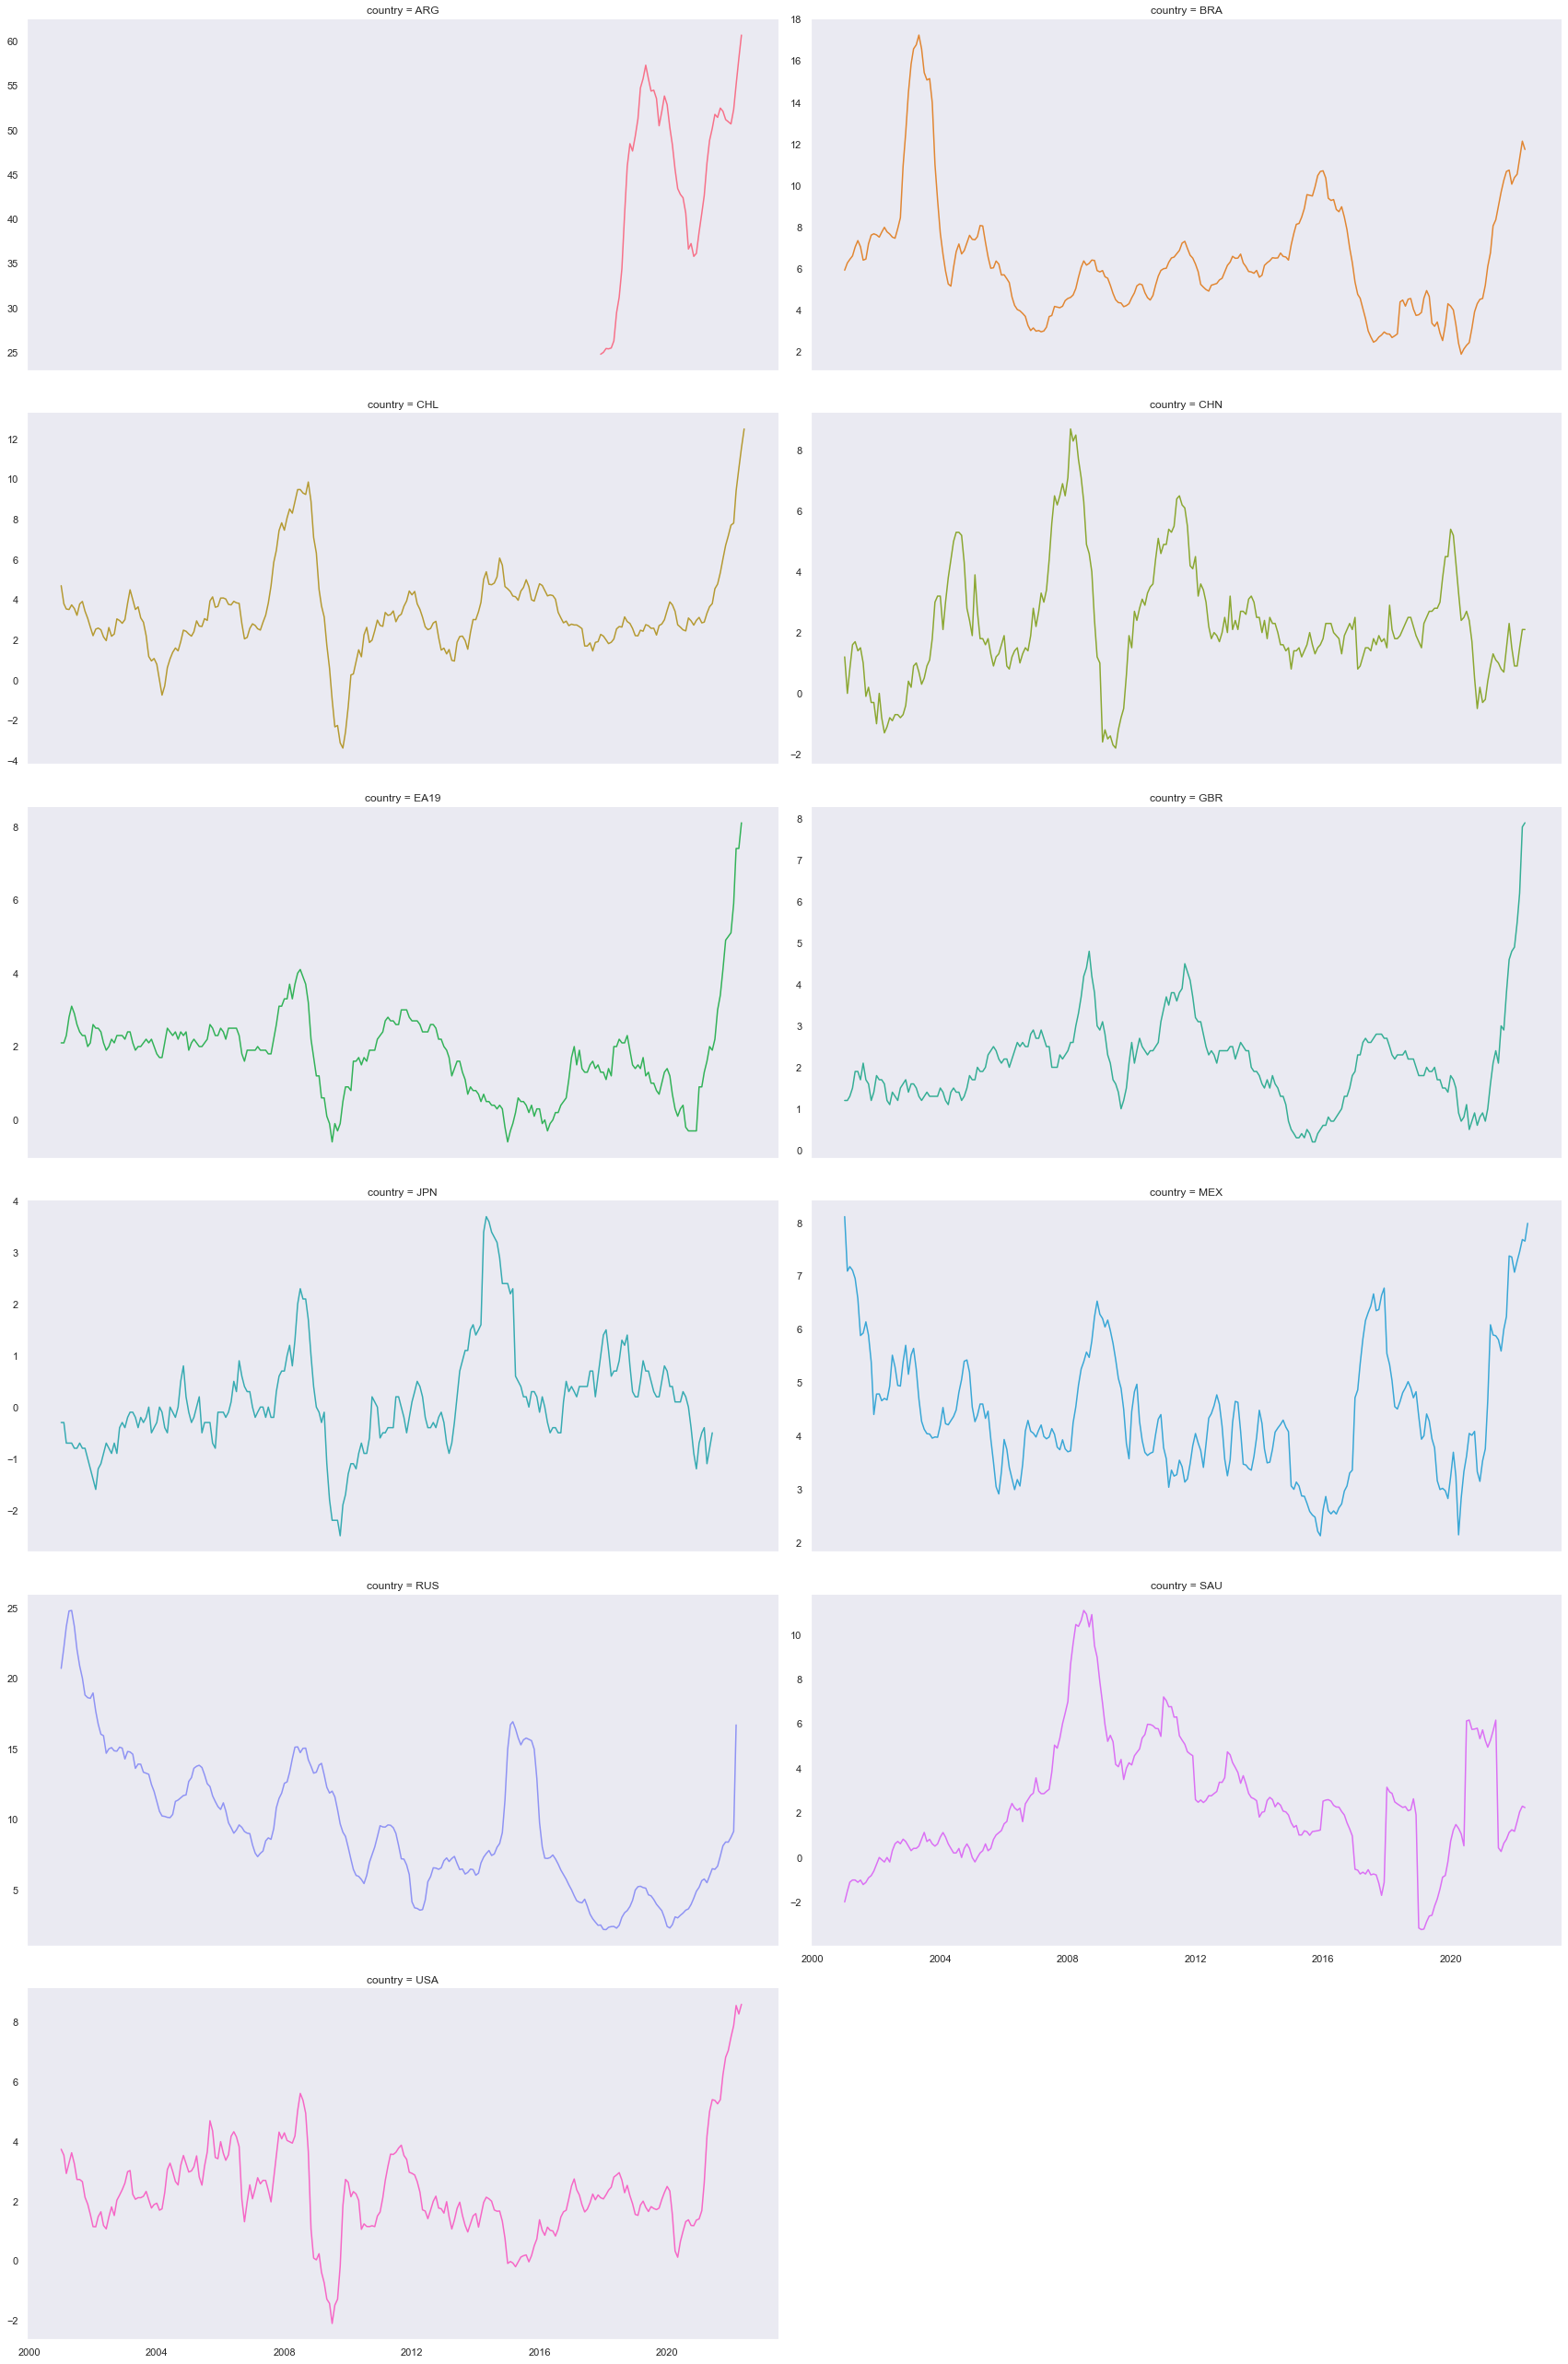

In [12]:
ax = sns.FacetGrid(cpi_xxi, col = 'country', col_wrap = 2, hue = 'country', sharey = False, height = 6, aspect = 2)
ax.map_dataframe(sns.lineplot, x = 'date', y = 'value').set(xlabel = '', ylabel = '')
plt.show()

# Country oficial Interest Rate - Monetary policy target
---

In [13]:
interest_data = oecd.data(
    resource_id = 'MEI',                                                    # MEI: Main Economic Indicators section
    key = 'AUS+CHL+JPN+MEX+GBR+USA+EA19+ARG+BRA+CHN+RUS+SAU.IRSTCI01.ST.M'  #  Countries and economic indicator selected: IRSTCI01 
                                                                            # (Interest Rates > Immediate rates (< 24 hrs) > Call money/Interbank rate > Total)
                                                                            # ST (Level, rate or national currency)
                                                                            # M (frequency: monthly)            
).to_pandas()
interest_raw = pd.DataFrame(interest_data).reset_index()
print(interest_raw.head())

  LOCATION   SUBJECT MEASURE FREQUENCY TIME_PERIOD  value
0      AUS  IRSTCI01      ST         M     1990-08  14.00
1      AUS  IRSTCI01      ST         M     1990-09  14.00
2      AUS  IRSTCI01      ST         M     1990-10  13.43
3      AUS  IRSTCI01      ST         M     1990-11  13.00
4      AUS  IRSTCI01      ST         M     1990-12  12.58


## Cleaning and organizing data

In [14]:
int_rts = (
    interest_raw[(interest_raw['SUBJECT'] == 'IRSTCI01')]
    .drop(['SUBJECT', 'MEASURE','FREQUENCY'], axis = 1)
    .rename({
        'LOCATION': 'country',
        'TIME_PERIOD' : 'date'
    }, axis = 1)
    .assign(date = lambda x: pd.to_datetime(x['date'], format = '%Y-%m'))
)


print(int_rts.head())

  country       date  value
0     AUS 1990-08-01  14.00
1     AUS 1990-09-01  14.00
2     AUS 1990-10-01  13.43
3     AUS 1990-11-01  13.00
4     AUS 1990-12-01  12.58


## Plotting

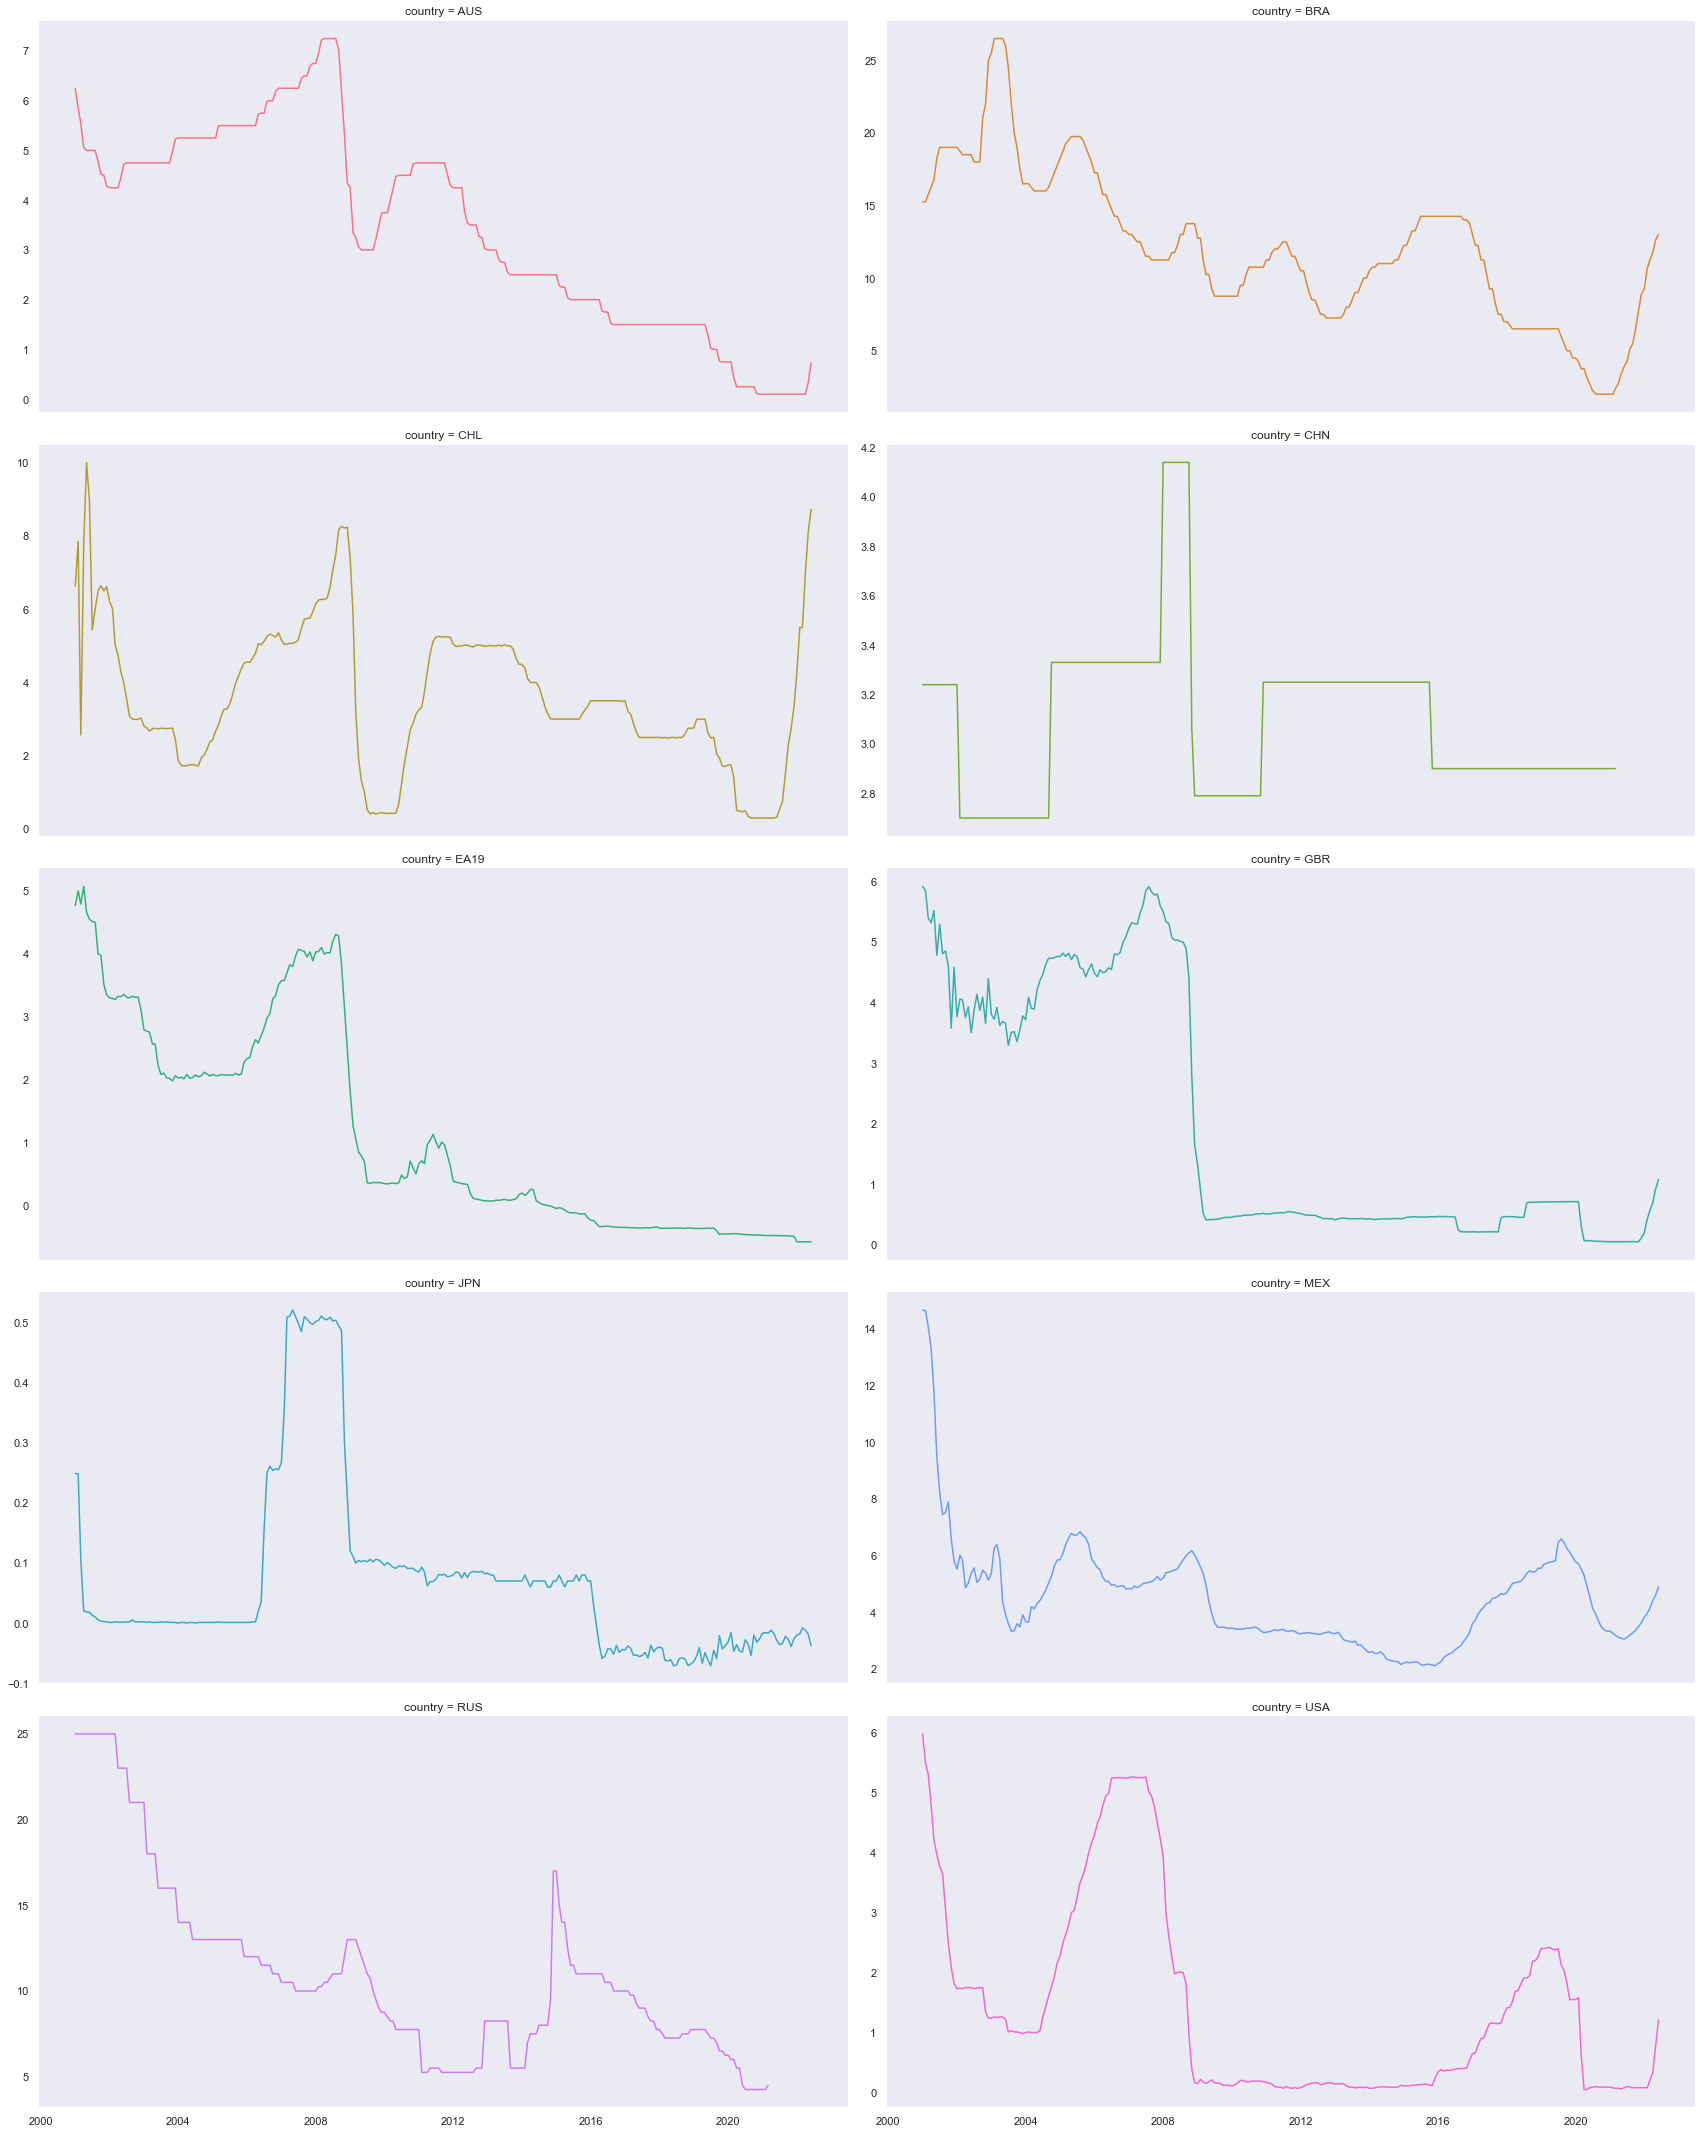

In [15]:
int_rts_xxi = int_rts[(int_rts.date > '2000-12')]

ax = sns.FacetGrid(int_rts_xxi, col = 'country', col_wrap = 2, hue = 'country', sharey = False, height = 6, aspect = 2)
ax.map_dataframe(sns.lineplot, x = 'date', y = 'value').set(xlabel = '', ylabel = '')
plt.show()

# Monthly Unemployment Rate
---

In [16]:
unemp_data = oecd.data(
    resource_id = 'KEI',                                                     # KEI: Key Economic Short-Term Indicators section
    key = 'LRHUTTTT.AUS+CHL+JPN+MEX+GBR+USA+EA19+ARG+BRA+CHN+RUS+SAU.ST.A+M' # Countries and economic indicator selected: LRHUTTTT  
                                                                             # (Montlhy Unemployment Rate - s.a)
                                                                             # ST (Level, rate or national currency) - In this case, Rate
                                                                             # A + M (frequency: annual + monthly)
).to_pandas()

unemp_raw = pd.DataFrame(unemp_data).reset_index()
unemp_raw = unemp_raw.iloc[:, [1, 0, 2, 3, 4, 5]]
print(unemp_raw.head())

  LOCATION   SUBJECT MEASURE FREQUENCY TIME_PERIOD  value
0      AUS  LRHUTTTT      ST         A        1967  1.875
1      AUS  LRHUTTTT      ST         A        1968  1.850
2      AUS  LRHUTTTT      ST         A        1969  1.800
3      AUS  LRHUTTTT      ST         A        1970  1.625
4      AUS  LRHUTTTT      ST         A        1971  1.925


## Cleaning and organizing data

In [17]:
mon_unemp = (
    unemp_raw[(unemp_raw['FREQUENCY'] == 'M')]
    .drop(['MEASURE', 'FREQUENCY', 'SUBJECT'], axis = 1)
    .rename({
        'LOCATION' : 'country',
        'TIME_PERIOD' : 'date'
    }, axis = 1)
    .assign(date = lambda x: pd.to_datetime(x['date'], format = '%Y-%m'))
)

mon_unemp.reset_index(inplace = True)
mon_unemp.drop(['index'], axis = 1, inplace = True)
print(mon_unemp.head())

  country       date     value
0     AUS 1978-02-01  6.644554
1     AUS 1978-03-01  6.301991
2     AUS 1978-04-01  6.267243
3     AUS 1978-05-01  6.208944
4     AUS 1978-06-01  6.302940


## Plotting

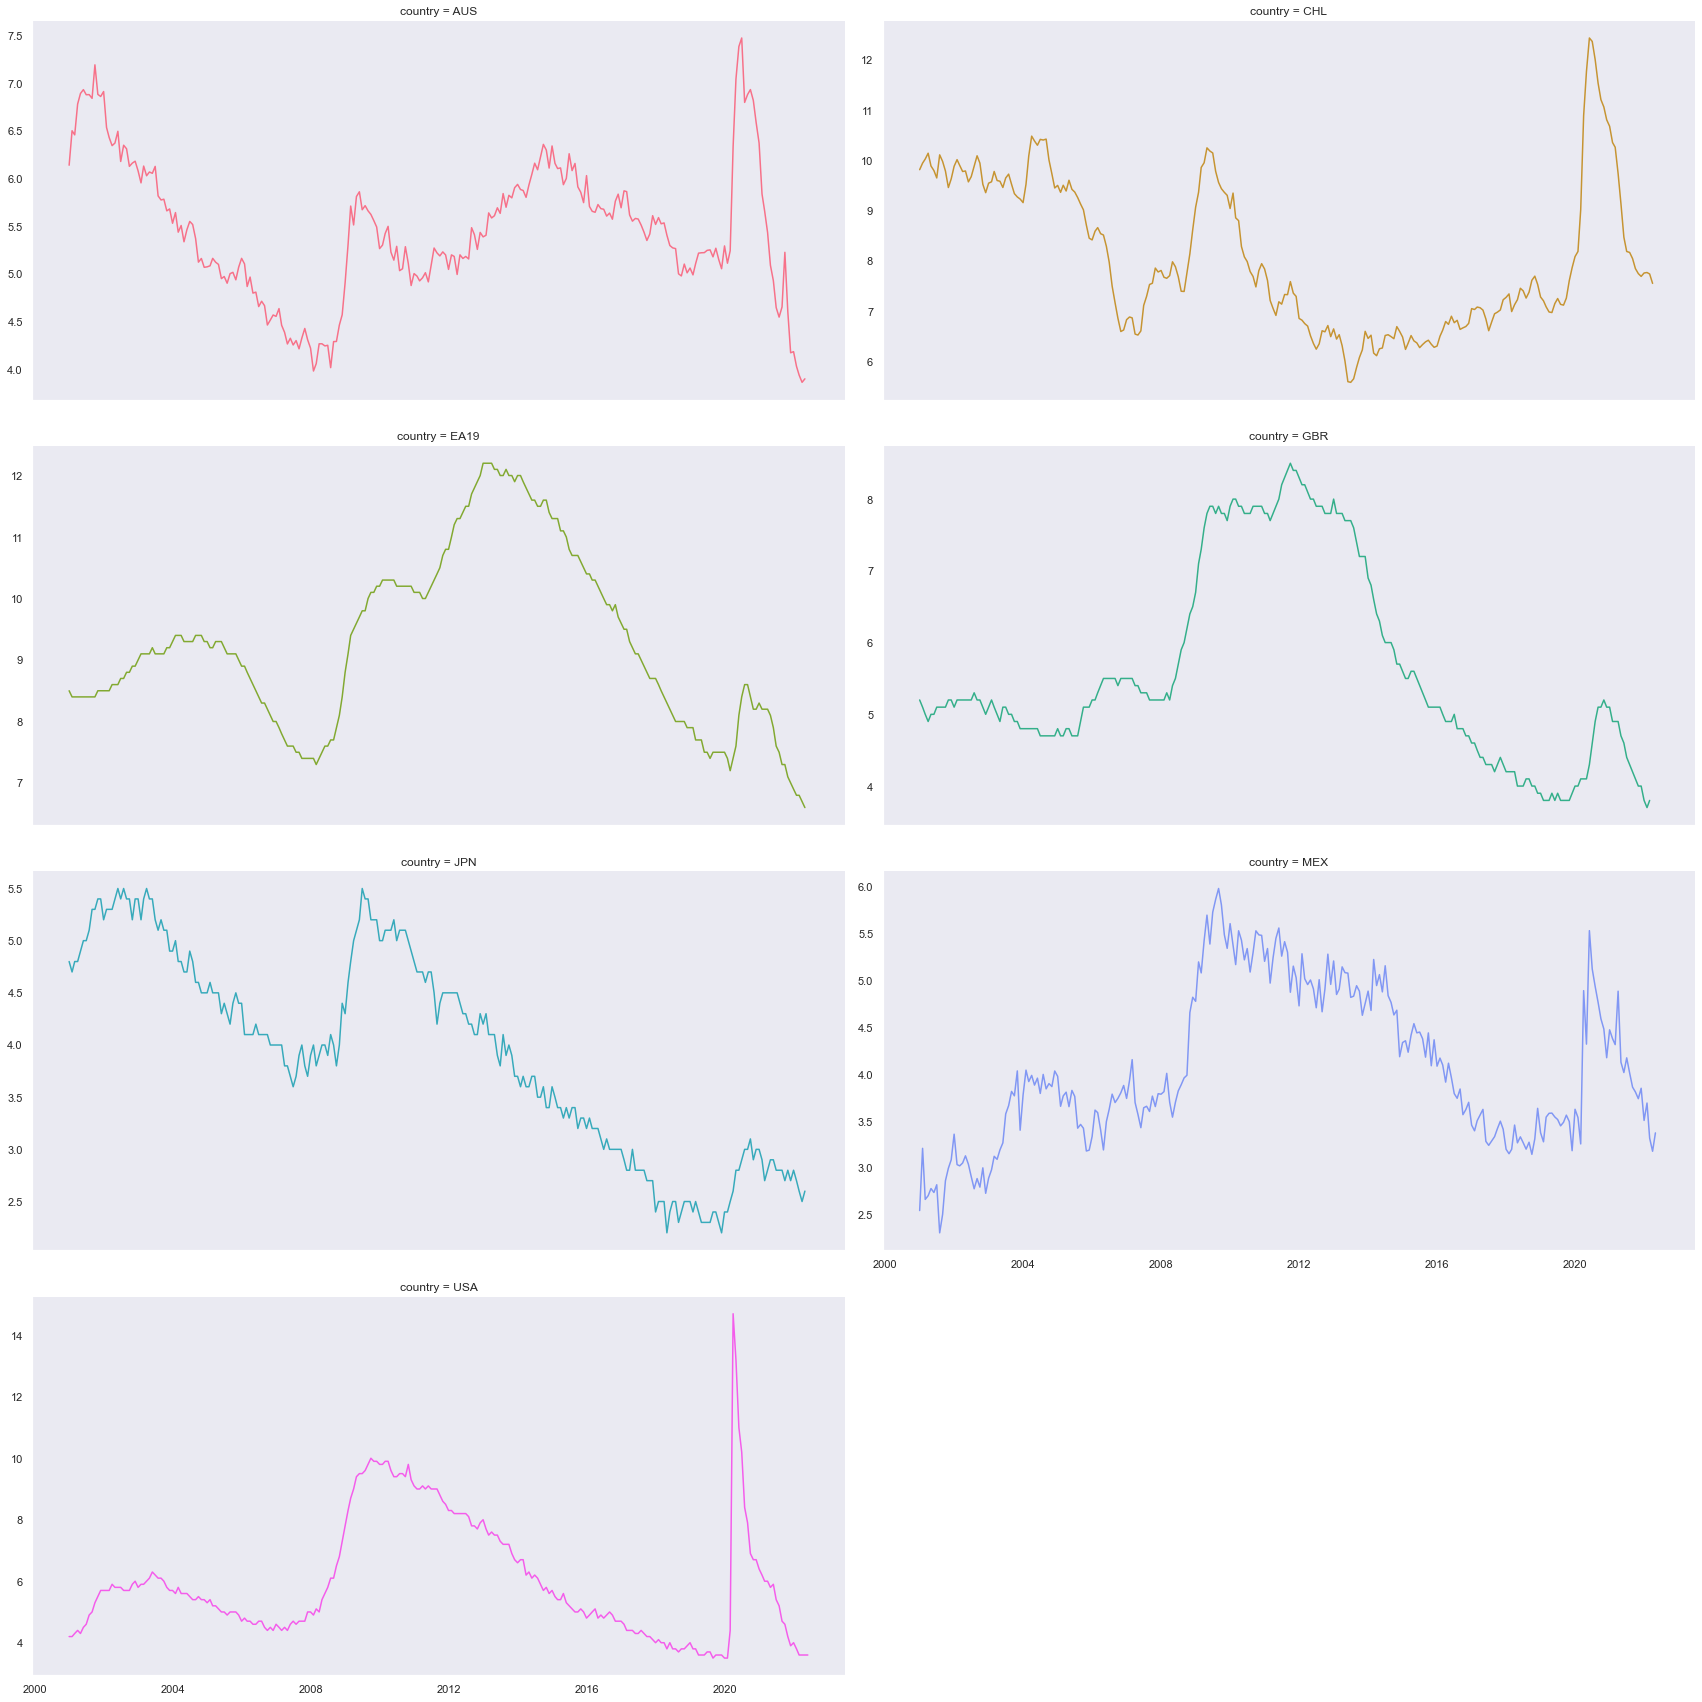

In [18]:
mon_unemp_xxi = mon_unemp[mon_unemp['date'] > '2000-12']

ax = sns.FacetGrid(mon_unemp_xxi, col = 'country', col_wrap = 2, hue = 'country', sharey = False, height = 6, aspect = 2)
ax.map_dataframe(sns.lineplot, x = 'date', y = 'value').set(xlabel = '', ylabel = '')
plt.show()